In [ ]:
import pandas as pd
from datetime import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [ ]:
#파일 불러오기 및 컬럼명 지정

In [ ]:
date1005 = pd.read_csv('1005.log-20211005', delimiter=' ') #10월 4일 ~ 10월 5일 
date1006 = pd.read_csv('1006.log-20211006', delimiter=' ') #10월 5일 ~ 10월 6일 
date1007 = pd.read_csv('1007.log-20211007', delimiter=' ') #10월 6일 ~ 10월 7일
date1008 = pd.read_csv('1008.log-20211008', delimiter=' ') #10월 7일 ~ 10월 8일
date1009 = pd.read_csv('1009.log-20211009', delimiter=' ') #10월 8일 ~ 10월 9일
date1010 = pd.read_csv('1010.log-20211010', delimiter=' ') #10월 9일 ~ 10월 10일
date1011 = pd.read_csv('1011.log-20211011', delimiter=' ') #10월 10일 ~ 10월 11일

In [ ]:
date1005.columns = ['IP 주소(요청자)', 'del1', 'del2','요청시간','del3','경로','HTTP 상태 코드','전송바이트(header제외)','요청소요시간','del4','del5','del6']
date1006.columns = ['IP 주소(요청자)', 'del1', 'del2','요청시간','del3','경로','HTTP 상태 코드','전송바이트(header제외)','요청소요시간','del4','del5','del6']
date1007.columns = ['IP 주소(요청자)', 'del1', 'del2','요청시간','del3','경로','HTTP 상태 코드','전송바이트(header제외)','요청소요시간','del4','del5','del6']
date1008.columns = ['IP 주소(요청자)', 'del1', 'del2','요청시간','del3','경로','HTTP 상태 코드','전송바이트(header제외)','요청소요시간','del4','del5','del6']
date1009.columns = ['IP 주소(요청자)', 'del1', 'del2','요청시간','del3','경로','HTTP 상태 코드','전송바이트(header제외)','요청소요시간','del4','del5','del6']
date1010.columns = ['IP 주소(요청자)', 'del1', 'del2','요청시간','del3','경로','HTTP 상태 코드','전송바이트(header제외)','요청소요시간','del4','del5','del6']
date1011.columns = ['IP 주소(요청자)', 'del1', 'del2','요청시간','del3','경로','HTTP 상태 코드','전송바이트(header제외)','요청소요시간','del4','del5','del6']

In [70]:
#날짜별로 되어있는 데이터 하나로 합쳐주기 (==>속도 문제로 일 별로 분리해서 분석)

allDate = pd.concat((date1005,date1006,date1007,date1008,date1009,date1010,date1011))
allDate= allDate.reset_index(drop=True)
allDate

,IP 주소(요청자),요청시간,경로,HTTP 상태 코드,전송바이트(header제외),시간
0,172.23.204.13,[04/Oct/2021:00:00:01,GET /cmp/main-pop-word/?limit=10&offset=0&FMY_...,200,64,NaN
1,172.23.204.13,[04/Oct/2021:00:00:01,GET /cmp/main-pop-word/?limit=10&offset=0&FMY_...,200,64,NaN
2,172.23.204.13,[04/Oct/2021:00:00:01,GET /cmp/main-pop-word/?limit=10&offset=0&FMY_...,200,1713,NaN
3,172.23.204.13,[04/Oct/2021:00:00:01,GET /cmp/main-pop-word/?limit=10&offset=0&FMY_...,200,1563,NaN
4,172.23.204.13,[04/Oct/2021:00:00:01,GET /cmp/main-pop-word/?limit=10&offset=0&FMY_...,200,1581,NaN
...,...,...,...,...,...,...
2353972,172.23.204.24,2021-10-10 23:59:58,GET /h-community/?limit=2&offset=0&search_mult...,200,3037,23.0
2353973,172.23.204.24,2021-10-10 23:59:58,GET /mat-mov/?limit=10&offset=0&search=6%ED%9A...,200,12963,23.0
2353974,172.23.204.24,2021-10-10 23:59:59,GET /cmp/ark-mid/?limit=10&offset=0&search=%EB...,200,64,23.0
2353975,172.23.204.24,2021-10-10 23:59:59,GET /mat-mov/?limit=10&offset=0&search=6%ED%9A...,200,16574,23.0


In [ ]:
#분석 방향
"""
1. 날짜별 접속 수
2. 시간대별 접속 수
3. 요청자 별 많이 접속한 사이트(다양한 추천에 도움 될 수 있음)
"""

#전처리 방향
"""
1. 필요없는 컬럼 삭제

2. 날짜별 접속 수
요청시간 데이터 날짜변수로 변환 후 그룹핑후 분석 진행

3. 시간대별 접속 수
요청시간 데이터 날짜변수로 변환 후 그룹핑후 분석 진행

4. 요청자 별 많이 접속한 사이트
요청자를 그룹핑한후 경로분석 진행
"""

In [ ]:
#전처리 진행
"""
1. 필요없는 컬럼 삭제
"""

date1005 = date1005.drop(['del1', 'del2', 'del3', 'del4', 'del5', 'del6',"요청소요시간"], axis = 1)
date1006 = date1006.drop(['del1', 'del2', 'del3', 'del4', 'del5', 'del6',"요청소요시간"], axis = 1)
date1007 = date1007.drop(['del1', 'del2', 'del3', 'del4', 'del5', 'del6',"요청소요시간"], axis = 1)
date1008 = date1008.drop(['del1', 'del2', 'del3', 'del4', 'del5', 'del6',"요청소요시간"], axis = 1)
date1009 = date1009.drop(['del1', 'del2', 'del3', 'del4', 'del5', 'del6',"요청소요시간"], axis = 1)
date1010 = date1010.drop(['del1', 'del2', 'del3', 'del4', 'del5', 'del6',"요청소요시간"], axis = 1)
date1011 = date1011.drop(['del1', 'del2', 'del3', 'del4', 'del5', 'del6',"요청소요시간"], axis = 1)

In [ ]:
#전처리 진행
""" 
2. 날짜별 접속 수
요청시간 데이터 날짜변수로 변환 후 그룹핑후 분석 진행

3. 시간대별 접속 수
요청시간 데이터 날짜변수로 변환 후 그룹핑후 분석 진행
"""

In [ ]:
#### 10.05 일 

# [04/Oct/2021:00:00:01  => 2021-10-04 00:00:01	(날짜 타입 변환 작업)
for i in range(len(date1005)):
    date1005["요청시간"][i] = datetime.strptime(date1005["요청시간"][i], "[%d/%b/%Y:%H:%M:%S")

date1005["요청시간"] = pd.to_datetime(date1005["요청시간"])
date1005["시간"] = date1005["요청시간"].dt.hour

In [ ]:
#시간별 접속사 수 분석
str_plt_style = 'seaborn'
plt.figure(figsize=(15,8))
plt.style.use([str_plt_style])
plt.plot(date1005Hour.index, date1005Hour.values, marker='s',  linestyle='-', linewidth=3)
plt.xticks(date1005Hour.index)
plt.title("21.10.05")
plt.legend(["accessor count"])

In [ ]:
#### 10.06 일 

#(날짜 타입 변환 작업)
for i in range(len(date1006)):
    date1006["요청시간"][i] = datetime.strptime(date1006["요청시간"][i], "[%d/%b/%Y:%H:%M:%S")

date1006["요청시간"] = pd.to_datetime(date1006["요청시간"])
date1006["시간"] = date1006["요청시간"].dt.hour


In [ ]:
#### 10.07 일 

#(날짜 타입 변환 작업)
for i in range(len(date1007)):
    date1007["요청시간"][i] = datetime.strptime(date1007["요청시간"][i], "[%d/%b/%Y:%H:%M:%S")

date1007["요청시간"] = pd.to_datetime(date1007["요청시간"])
date1007["시간"] = date1007["요청시간"].dt.hour

In [ ]:
#### 10.08 일 

#(날짜 타입 변환 작업)
for i in range(len(date1008)):
    date1008["요청시간"][i] = datetime.strptime(date1008["요청시간"][i], "[%d/%b/%Y:%H:%M:%S")

date1008["요청시간"] = pd.to_datetime(date1008["요청시간"])
date1008["시간"] = date1008["요청시간"].dt.hour

In [ ]:
#### 10.09 일 

#(날짜 타입 변환 작업)	
for i in range(len(date1009)):
    date1009["요청시간"][i] = datetime.strptime(date1009["요청시간"][i], "[%d/%b/%Y:%H:%M:%S")

date1009["요청시간"] = pd.to_datetime(date1009["요청시간"])
date1009["시간"] = date1009["요청시간"].dt.hour



In [ ]:
#### 10.10 일 

#(날짜 타입 변환 작업)
for i in range(len(date1010)):
    date1010["요청시간"][i] = datetime.strptime(date1010["요청시간"][i], "[%d/%b/%Y:%H:%M:%S")

date1010["요청시간"] = pd.to_datetime(date1010["요청시간"])
date1010["시간"] = date1010["요청시간"].dt.hour

In [ ]:
#### 10.11 일 

#(날짜 타입 변환 작업)
for i in range(len(date1011)):
    date1011["요청시간"][i] = datetime.strptime(date1011["요청시간"][i], "[%d/%b/%Y:%H:%M:%S")

date1011["요청시간"] = pd.to_datetime(date1011["요청시간"])
date1011["시간"] = date1011["요청시간"].dt.hour

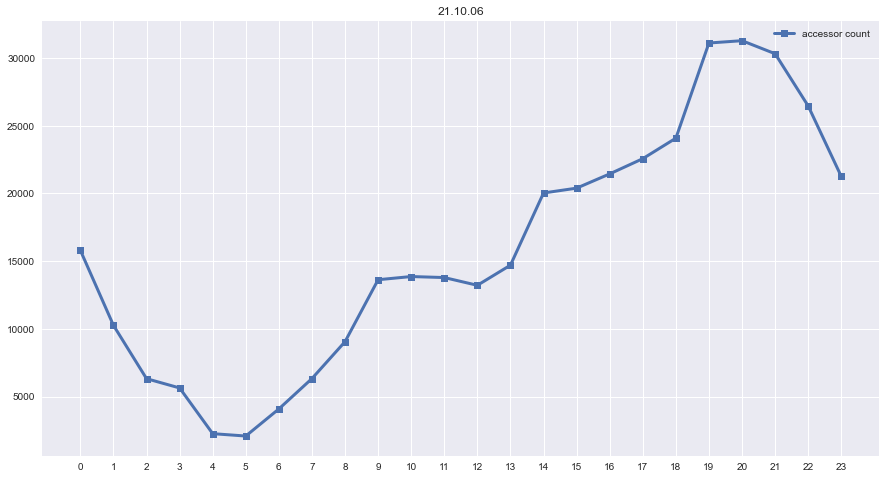

In [63]:

#시간별 접속사 수 분석
date1006Hour = date1006["IP 주소(요청자)"].groupby(date1006["시간"]).count()
plt.figure(figsize=(15,8))
str_plt_style = 'seaborn'
plt.style.use([str_plt_style])
plt.plot(date1006Hour.index, date1006Hour.values, marker='s',  linestyle='-', linewidth=3)
plt.xticks(date1006Hour.index)
plt.title("21.10.06")
plt.legend(["accessor count"])

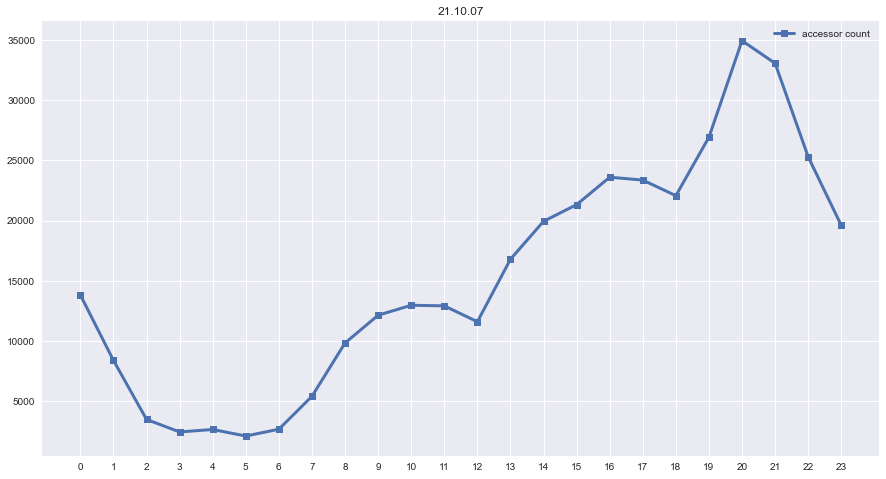

In [64]:
#시간별 접속사 수 분석
date1007Hour = date1007["IP 주소(요청자)"].groupby(date1007["시간"]).count()
plt.figure(figsize=(15,8))
str_plt_style = 'seaborn'
plt.style.use([str_plt_style])
plt.plot(date1007Hour.index, date1007Hour.values, marker='s',  linestyle='-', linewidth=3)
plt.xticks(date1007Hour.index)
plt.title("21.10.07")
plt.legend(["accessor count"])

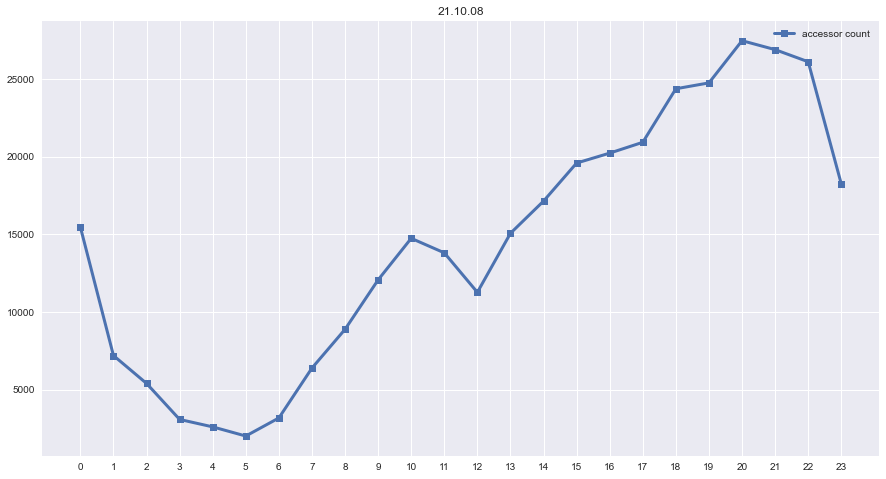

In [65]:
#시간별 접속사 수 분석
date1008Hour = date1008["IP 주소(요청자)"].groupby(date1008["시간"]).count()
plt.figure(figsize=(15,8))
str_plt_style = 'seaborn'
plt.style.use([str_plt_style])
plt.plot(date1008Hour.index, date1008Hour.values, marker='s',  linestyle='-', linewidth=3)
plt.xticks(date1008Hour.index)
plt.title("21.10.08")
plt.legend(["accessor count"])

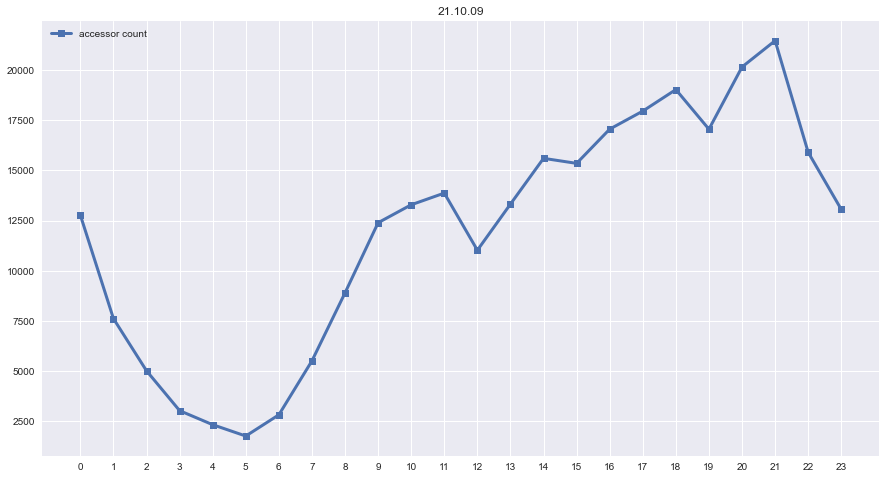

In [66]:
#시간별 접속사 수 분석
date1009Hour = date1009["IP 주소(요청자)"].groupby(date1009["시간"]).count()
plt.figure(figsize=(15,8))
str_plt_style = 'seaborn'
plt.style.use([str_plt_style])
plt.plot(date1009Hour.index, date1009Hour.values, marker='s',  linestyle='-', linewidth=3)
plt.xticks(date1009Hour.index)
plt.title("21.10.09")
plt.legend(["accessor count"])

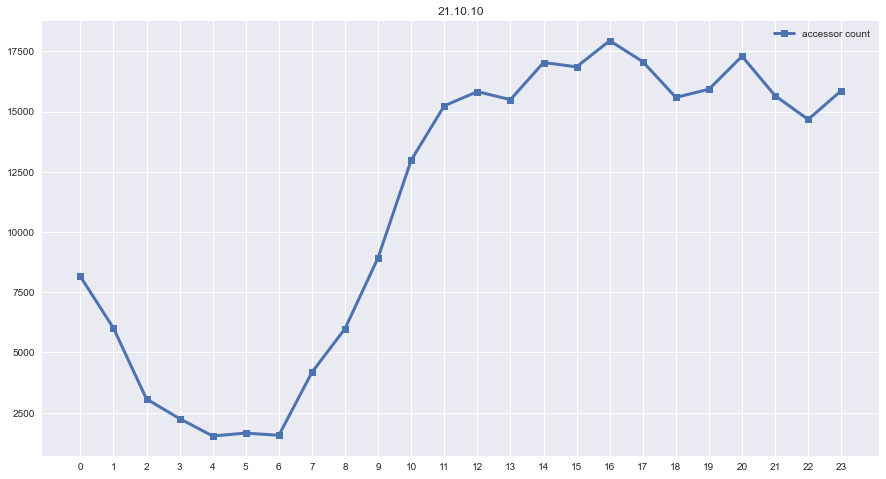

In [67]:
#시간별 접속사 수 분석
date1010Hour = date1010["IP 주소(요청자)"].groupby(date1010["시간"]).count()
plt.figure(figsize=(15,8))
str_plt_style = 'seaborn'
plt.style.use([str_plt_style])
plt.plot(date1010Hour.index, date1010Hour.values, marker='s',  linestyle='-', linewidth=3)
plt.xticks(date1010Hour.index)
plt.title("21.10.10")
plt.legend(["accessor count"])

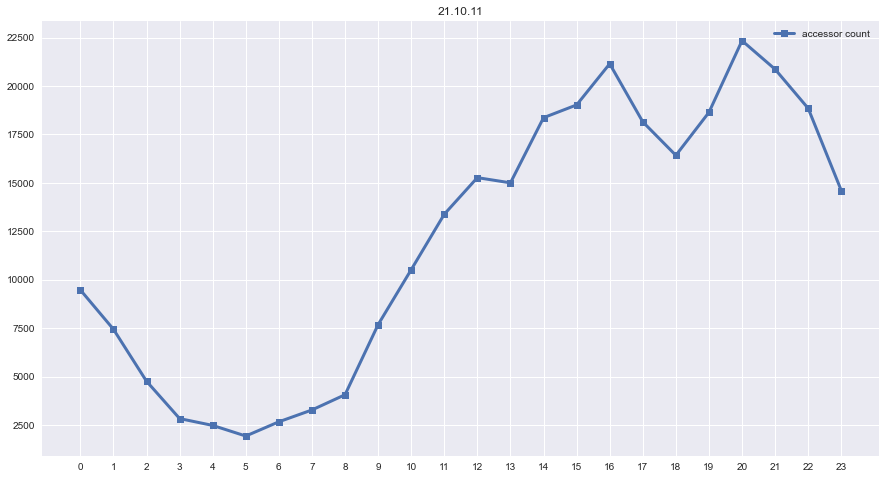

In [68]:
#시간별 접속사 수 분석
date1011Hour = date1011["IP 주소(요청자)"].groupby(date1011["시간"]).count()
plt.figure(figsize=(15,8))
str_plt_style = 'seaborn'
plt.style.use([str_plt_style])
plt.plot(date1011Hour.index, date1011Hour.values, marker='s',  linestyle='-', linewidth=3)
plt.xticks(date1011Hour.index)
plt.title("21.10.11")
plt.legend(["accessor count"])

In [78]:
#####경로분석


'h-ibsi/?limit=2&offset=1&search_multi_match=%EA%B9%80%EB%A7%8C%EC%A4%91%EA%B5%AC%EC%9A%B4%EB%AA%BD&BBS_CD__terms=B123&CAT_GBN__terms=UET5 HTTP/1.1'

In [83]:
for i in range(len(date1006)):
    tmp = date1006["경로"][i].find("?")
    date1006["경로"][i] = date1006["경로"][i][5:tmp]

In [84]:
date1006

,IP 주소(요청자),요청시간,경로,HTTP 상태 코드,전송바이트(header제외),시간
0,172.23.204.23,2021-10-05 00:00:04,h-ibsi/,200,443,0
1,172.23.204.23,2021-10-05 00:00:04,h-ibsi/,200,443,0
2,172.23.204.23,2021-10-05 00:00:04,h-ibsi/,200,423,0
3,172.23.204.23,2021-10-05 00:00:04,h-ibsi/,200,423,0
4,172.23.204.23,2021-10-05 00:00:04,h-univ/,200,289,0
...,...,...,...,...,...,...
380000,172.23.204.23,2021-10-06 00:00:01,cmp/ark-main/,200,64,0
380001,172.23.204.24,2021-10-06 00:00:01,cmp/main-pop-word/,200,64,0
380002,172.23.204.23,2021-10-06 00:00:01,cmp/ark-main/,200,64,0
380003,172.23.204.24,2021-10-06 00:00:01,h-lecture/,200,4649,0
